In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
import warnings

In [2]:
df=pd.read_csv("C:\\Users\\santh\\OneDrive\\Documents\\customer_conversion_traing_dataset .csv")

In [3]:
df.head()

,LeadID,Age,Gender,Location,LeadSource,TimeSpent (minutes),PagesViewed,LeadStatus,EmailSent,DeviceType,ReferralSource,FormSubmissions,Downloads,CTR_ProductPage,ResponseTime (hours),FollowUpEmails,SocialMediaEngagement,PaymentHistory,Conversion (Target)
0,1,60,Female,Faisalabad,Referral,30,13,Warm,1,Desktop,Google,4,0,0.3,7,10,195,No Payment,0
1,2,27,Female,Islamabad,Referral,28,4,Hot,7,Desktop,Direct,2,2,0.3,13,3,103,No Payment,0
2,3,21,Female,Rawalpindi,Referral,45,10,Warm,9,Tablet,Direct,4,2,0.6,10,8,33,No Payment,0
3,4,37,Female,Faisalabad,Email,45,15,Warm,5,Desktop,ReferralSite,1,3,0.3,11,1,189,Good,0
4,5,35,Male,Karachi,Referral,31,11,Cold,2,Tablet,Google,4,3,0.5,9,2,83,No Payment,0


In [4]:
df.columns=[x.lower()for x in df.columns]

In [5]:
df.drop("leadid",axis=1,inplace=True)

In [6]:
df.head()

,age,gender,location,leadsource,timespent (minutes),pagesviewed,leadstatus,emailsent,devicetype,referralsource,formsubmissions,downloads,ctr_productpage,responsetime (hours),followupemails,socialmediaengagement,paymenthistory,conversion (target)
0,60,Female,Faisalabad,Referral,30,13,Warm,1,Desktop,Google,4,0,0.3,7,10,195,No Payment,0
1,27,Female,Islamabad,Referral,28,4,Hot,7,Desktop,Direct,2,2,0.3,13,3,103,No Payment,0
2,21,Female,Rawalpindi,Referral,45,10,Warm,9,Tablet,Direct,4,2,0.6,10,8,33,No Payment,0
3,37,Female,Faisalabad,Email,45,15,Warm,5,Desktop,ReferralSite,1,3,0.3,11,1,189,Good,0
4,35,Male,Karachi,Referral,31,11,Cold,2,Tablet,Google,4,3,0.5,9,2,83,No Payment,0


In [7]:
df.shape

(100000, 18)

In [8]:
df.isnull().sum()

age                      0
gender                   0
location                 0
leadsource               0
timespent (minutes)      0
pagesviewed              0
leadstatus               0
emailsent                0
devicetype               0
referralsource           0
formsubmissions          0
downloads                0
ctr_productpage          0
responsetime (hours)     0
followupemails           0
socialmediaengagement    0
paymenthistory           0
conversion (target)      0
dtype: int64

In [9]:
df.dtypes

age                        int64
gender                    object
location                  object
leadsource                object
timespent (minutes)        int64
pagesviewed                int64
leadstatus                object
emailsent                  int64
devicetype                object
referralsource            object
formsubmissions            int64
downloads                  int64
ctr_productpage          float64
responsetime (hours)       int64
followupemails             int64
socialmediaengagement      int64
paymenthistory            object
conversion (target)        int64
dtype: object

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,39.995810,11.854746,20.0,30.0,40.0,50.0,60.0
timespent (minutes),100000.0,32.529550,16.150348,5.0,19.0,33.0,47.0,60.0
pagesviewed,100000.0,8.502020,4.029558,2.0,5.0,8.0,12.0,15.0
emailsent,100000.0,5.001580,3.169473,0.0,2.0,5.0,8.0,10.0
formsubmissions,100000.0,2.499790,1.708610,0.0,1.0,3.0,4.0,5.0
downloads,100000.0,1.498820,1.117484,0.0,0.0,2.0,2.0,3.0
ctr_productpage,100000.0,0.449336,0.206320,0.1,0.3,0.4,0.6,0.8
responsetime (hours),100000.0,12.514950,6.929558,1.0,7.0,13.0,19.0,24.0
followupemails,100000.0,4.984590,3.166025,0.0,2.0,5.0,8.0,10.0
socialmediaengagement,100000.0,110.106390,52.204422,20.0,65.0,110.0,155.0,200.0


In [11]:
int_dtypes=[]
for i in df.columns:
  if df[i].dtypes=="int64":
    print(int_dtypes.append(i))

None
None
None
None
None
None
None
None
None
None


In [12]:
int_dtypes

['age',
 'timespent (minutes)',
 'pagesviewed',
 'emailsent',
 'formsubmissions',
 'downloads',
 'responsetime (hours)',
 'followupemails',
 'socialmediaengagement',
 'conversion (target)']

In [13]:
obj_dtypes=[]
for i in df.columns:
  if df[i].dtypes=="object":
    obj_dtypes.append(i)

In [14]:
obj_dtypes

['gender',
 'location',
 'leadsource',
 'leadstatus',
 'devicetype',
 'referralsource',
 'paymenthistory']

In [15]:
float_dtypes=[]
for i in df.columns:
  if df[i].dtypes=="float64":
    float_dtypes.append(i)

In [16]:
float_dtypes

['ctr_productpage']

In [17]:
for i in obj_dtypes:
  print(f"columns {i} is divided into {len(df[i].value_counts())} categories")

columns gender is divided into 2 categories
columns location is divided into 10 categories
columns leadsource is divided into 4 categories
columns leadstatus is divided into 3 categories
columns devicetype is divided into 3 categories
columns referralsource is divided into 5 categories
columns paymenthistory is divided into 2 categories


In [18]:
df.gender.value_counts()

Male      50123
Female    49877
Name: gender, dtype: int64

In [19]:
df.location.value_counts()

Faisalabad    10196
Peshawar      10096
Gujranwala    10064
Lahore        10057
Islamabad     10039
Karachi        9993
Sialkot        9972
Multan         9953
Rawalpindi     9823
Quetta         9807
Name: location, dtype: int64

In [20]:
df.leadsource.value_counts()

Organic         25257
Social Media    25030
Email           24947
Referral        24766
Name: leadsource, dtype: int64

In [21]:
df.leadstatus.value_counts()

Cold    33435
Hot     33288
Warm    33277
Name: leadstatus, dtype: int64

In [22]:
df.devicetype.value_counts()

Mobile     33724
Desktop    33217
Tablet     33059
Name: devicetype, dtype: int64

In [23]:
df.referralsource.value_counts()

ReferralSite    20080
Facebook        20076
Twitter         20025
Direct          19949
Google          19870
Name: referralsource, dtype: int64

In [24]:
df.paymenthistory.value_counts()

Good          50111
No Payment    49889
Name: paymenthistory, dtype: int64

In [25]:
obj_dtypes

['gender',
 'location',
 'leadsource',
 'leadstatus',
 'devicetype',
 'referralsource',
 'paymenthistory']

Text(0.5, 0, 'paymenthistory')

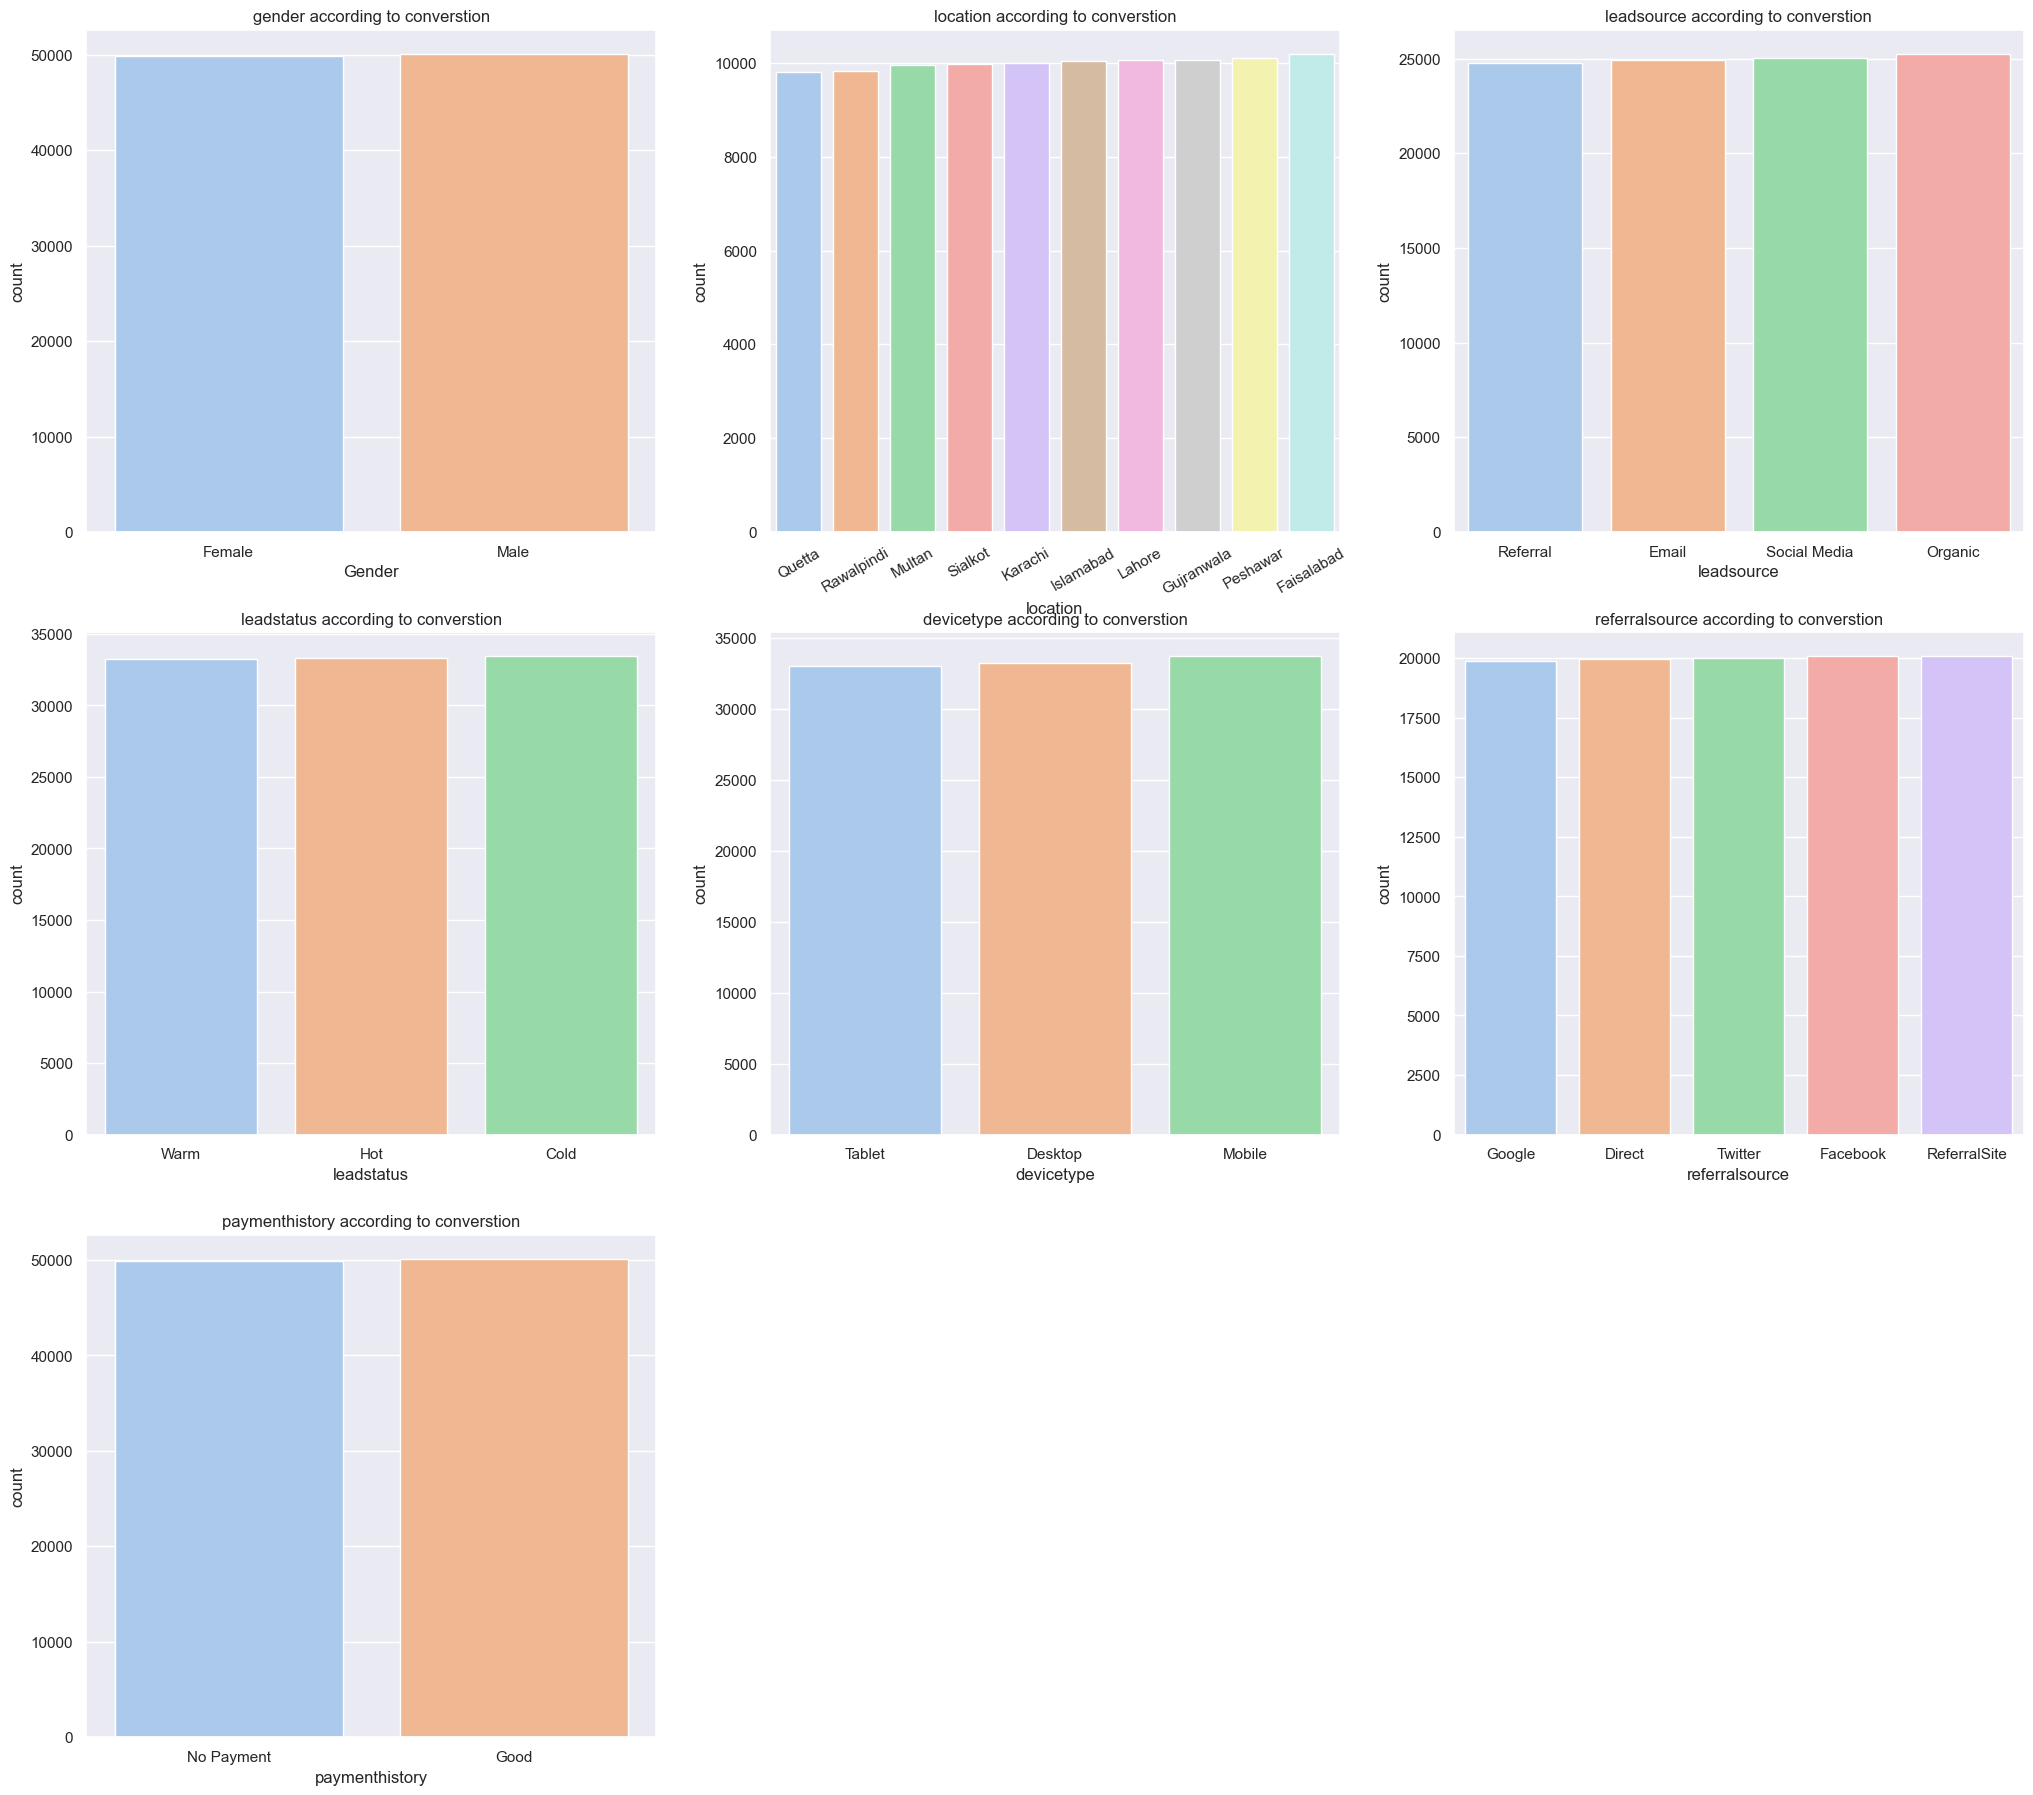

In [26]:
plt.figure(figsize=(25,30))
sns.set_theme(style="darkgrid",palette="pastel")

plt.subplot(431)
sns.countplot(x=df['gender'],order=df['gender'].value_counts().index[::-1])
plt.title("gender according to converstion")
plt.xlabel("Gender")

plt.subplot(432)
sns.countplot(x=df["location"],order=df['location'].value_counts().index[::-1])
plt.title("location according to converstion")
plt.xlabel("location")
plt.xticks(rotation=30)

plt.subplot(433)
sns.countplot(x=df["leadsource"],order=df['leadsource'].value_counts().index[::-1])
plt.title("leadsource according to converstion")
plt.xlabel("leadsource")

plt.subplot(434)
sns.countplot(x=df["leadstatus"],order=df['leadstatus'].value_counts().index[::-1])
plt.title("leadstatus according to converstion")
plt.xlabel("leadstatus")

plt.subplot(435)
sns.countplot(x=df["devicetype"],order=df['devicetype'].value_counts().index[::-1])
plt.title("devicetype according to converstion")
plt.xlabel("devicetype")

plt.subplot(436)
sns.countplot(x=df["referralsource"],order=df['referralsource'].value_counts().index[::-1])
plt.title("referralsource according to converstion")
plt.xlabel("referralsource")

plt.subplot(437)
sns.countplot(x=df["paymenthistory"],order=df['paymenthistory'].value_counts().index[::-1])
plt.title("paymenthistory according to converstion")
plt.xlabel("paymenthistory")

<Axes: xlabel='paymenthistory'>

<Figure size 2000x2500 with 0 Axes>

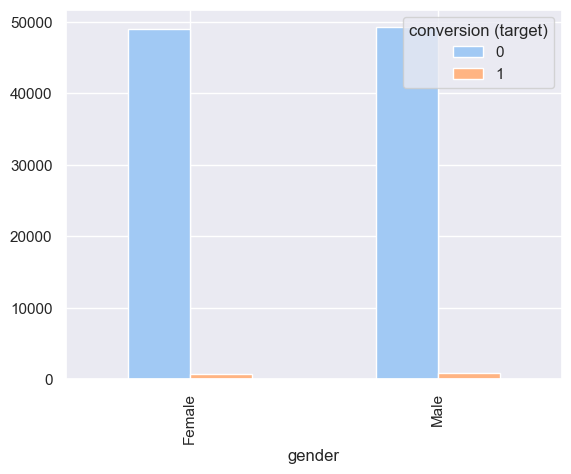

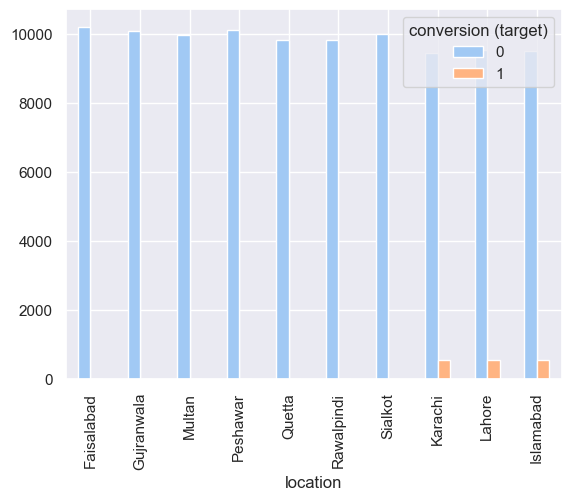

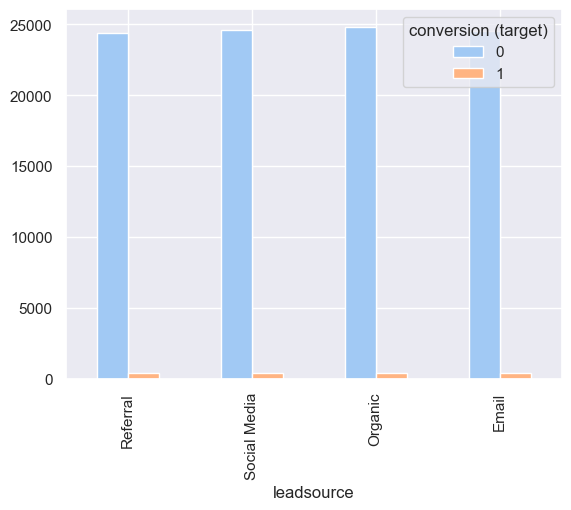

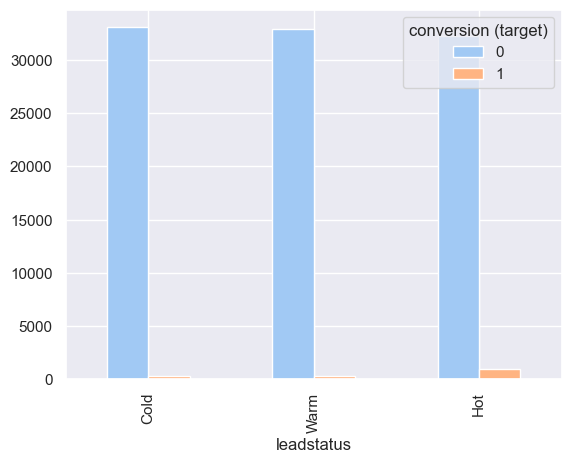

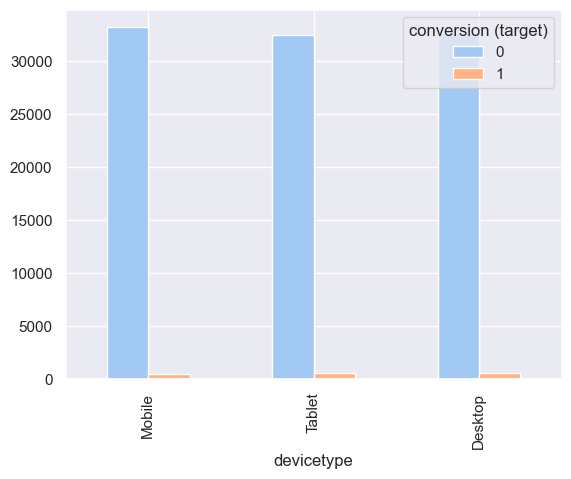

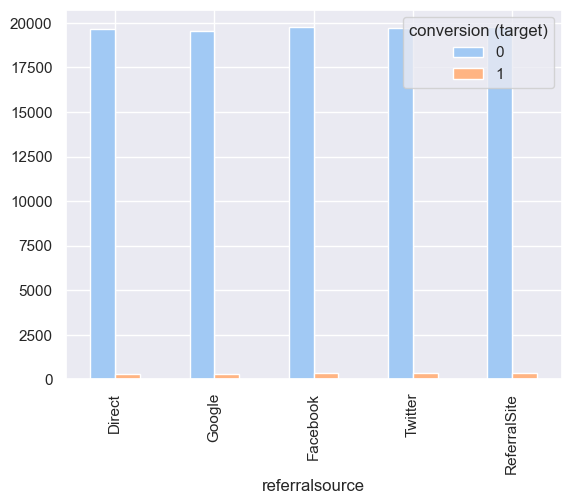

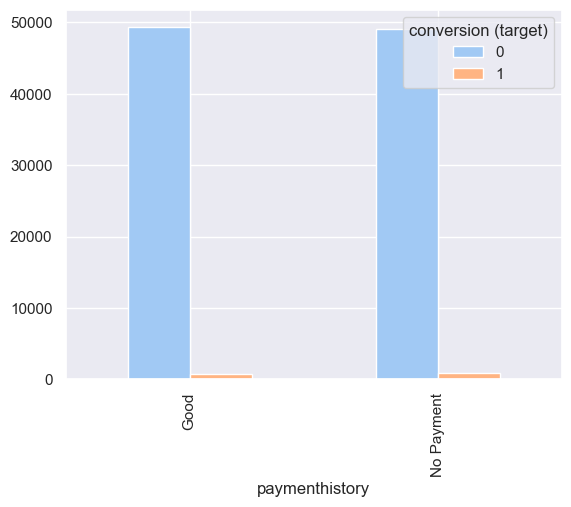

In [27]:
plt.figure(figsize=(20,25))
df.groupby(["gender","conversion (target)"]).size().unstack(fill_value=0).sort_values(by=1).plot(kind="bar")
df.groupby(["location","conversion (target)"]).size().unstack(fill_value=0).sort_values(by=1).plot(kind="bar")
df.groupby(["leadsource","conversion (target)"]).size().unstack(fill_value=0).sort_values(by=1).plot(kind="bar")
df.groupby(["leadstatus","conversion (target)"]).size().unstack(fill_value=0).sort_values(by=1).plot(kind="bar")
df.groupby(["devicetype","conversion (target)"]).size().unstack(fill_value=0).sort_values(by=1).plot(kind="bar")
df.groupby(["referralsource","conversion (target)"]).size().unstack(fill_value=0).sort_values(by=1).plot(kind="bar")
df.groupby(["paymenthistory","conversion (target)"]).size().unstack(fill_value=0).sort_values(by=1).plot(kind="bar")

<Axes: xlabel='conversion (target)', ylabel='formsubmissions'>

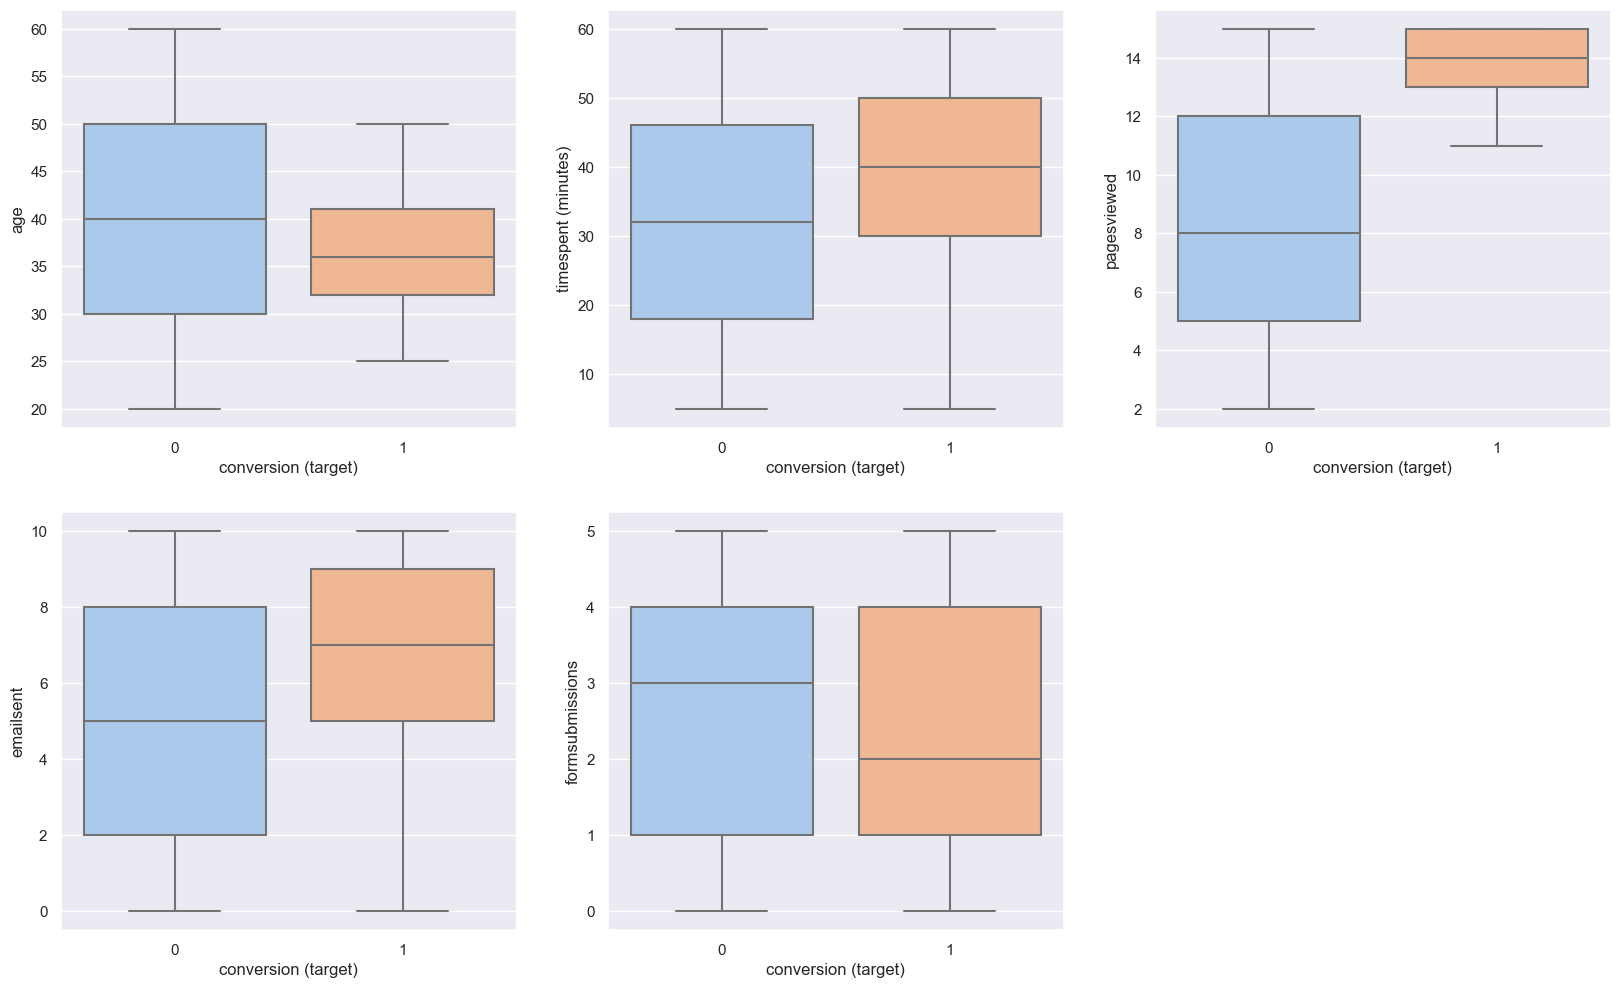

In [28]:
plt.figure(figsize=(20,25))

plt.subplot(431)
sns.boxplot(x=df['conversion (target)'],y=df['age'])

plt.subplot(432)
sns.boxplot(x=df['conversion (target)'],y=df['timespent (minutes)'])

plt.subplot(433)
sns.boxplot(x=df['conversion (target)'],y=df["pagesviewed"])

plt.subplot(434)
sns.boxplot(x=df['conversion (target)'],y=df["emailsent"])

plt.subplot(435)
sns.boxplot(x=df['conversion (target)'],y=df['formsubmissions'])

<Axes: xlabel='conversion (target)', ylabel='ctr_productpage'>

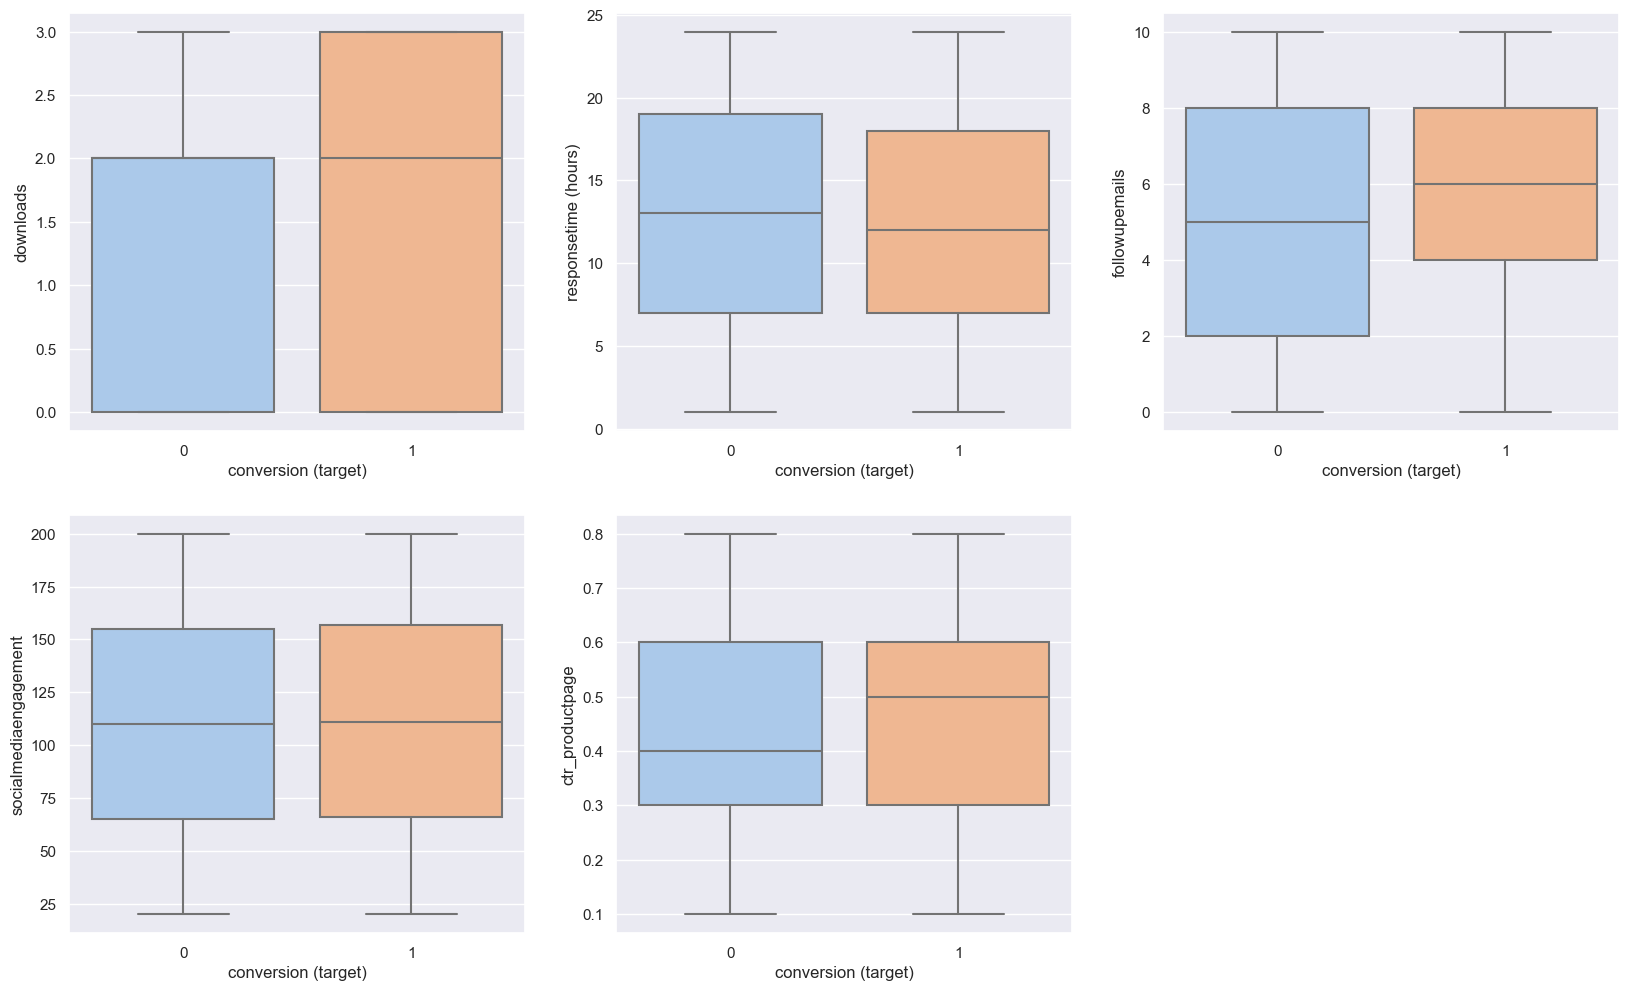

In [29]:
plt.figure(figsize=(20,25))

plt.subplot(431)
sns.boxplot(x=df['conversion (target)'],y=df['downloads'])

plt.subplot(432)
sns.boxplot(x=df['conversion (target)'],y=df['responsetime (hours)'])

plt.subplot(433)
sns.boxplot(x=df['conversion (target)'],y=df["followupemails"])

plt.subplot(434)
sns.boxplot(x=df['conversion (target)'],y=df["socialmediaengagement"])

plt.subplot(435)
sns.boxplot(x=df['conversion (target)'],y=df['ctr_productpage'])

In [30]:
del df['socialmediaengagement']

<pre> encode data

In [31]:
df['leadstatus'].unique()

array(['Warm', 'Hot', 'Cold'], dtype=object)

In [32]:
df['gender']=df['gender'].map({"Female":0,"Male":1})
df['location']=df['location'].map({"Faisalabad":0,"Gujranwala":1,"Multan":2,"Peshawar":3,"Quetta":4,"Rawalpindi":5,"Sialkot":6,"Karachi":7,"Lahore":8,"Islamabad":9})
df['devicetype']=df['devicetype'].map({"Mobile":0,"Tablet":1,"Desktop":2})
df["leadsource"]=df['leadsource'].map({"Referral":0,"Social Media":1,"Organic":2,"Email":3})
df['referralsource']=df['referralsource'].map({"Direct":0,"Google":1,"Facebook":2,"Twitter":3,"ReferralSite":4})
df["paymenthistory"]=df['paymenthistory'].map({"Good":0,"No Payment":1})
df['leadstatus']=df['leadstatus'].map({"Cold":0,"Warm":1,"Hot":2})

In [33]:
df.head()

,age,gender,location,leadsource,timespent (minutes),pagesviewed,leadstatus,emailsent,devicetype,referralsource,formsubmissions,downloads,ctr_productpage,responsetime (hours),followupemails,paymenthistory,conversion (target)
0,60,0,0,0,30,13,1,1,2,1,4,0,0.3,7,10,1,0
1,27,0,9,0,28,4,2,7,2,0,2,2,0.3,13,3,1,0
2,21,0,5,0,45,10,1,9,1,0,4,2,0.6,10,8,1,0
3,37,0,0,3,45,15,1,5,2,4,1,3,0.3,11,1,0,0
4,35,1,7,0,31,11,0,2,1,1,4,3,0.5,9,2,1,0


In [34]:
X=df.drop("conversion (target)",axis=1)
y=df['conversion (target)']

In [35]:
from imblearn.combine import SMOTEENN

smt = SMOTEENN(sampling_strategy='all')
X_smt, y_smt = smt.fit_resample(X, y)

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X_smt,y_smt,test_size=0.3,random_state=42)

In [37]:
warnings.filterwarnings("ignore")

In [38]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
cross_val_score(lr,X_train,y_train,cv=5,scoring=make_scorer(roc_auc_score)).mean()

0.9398522061222234

In [42]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
k_value=np.arange(1,31)
for k in k_value:
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  print("k value",k,"train score",knn.score(X_train_scaled,y_train),"val score",np.mean(cross_val_score(knn,X_train_scaled,y_train,cv=10,scoring=make_scorer(roc_auc_score))))

k value 1 train score 0.48919346336320507 val score 0.9744209574165742
k value 2 train score 0.48919346336320507 val score 0.977329647326532
k value 3 train score 0.48919346336320507 val score 0.9615034819799542
k value 4 train score 0.48919346336320507 val score 0.9647520637255473
k value 5 train score 0.48919346336320507 val score 0.9525337224416239
k value 6 train score 0.48919346336320507 val score 0.956282524630107
k value 7 train score 0.48919346336320507 val score 0.9464624713631228
k value 8 train score 0.48919346336320507 val score 0.9502501681940743
k value 9 train score 0.48919346336320507 val score 0.9417726770167286
k value 10 train score 0.48919346336320507 val score 0.9453934253885574
k value 11 train score 0.48919346336320507 val score 0.9380924810688848
k value 12 train score 0.48919346336320507 val score 0.941682240806046
k value 13 train score 0.48919346336320507 val score 0.9354744145649703
k value 14 train score 0.48919346336320507 val score 0.9386161293859866
k va

In [45]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_scaled,y_train)
cross_val_score(knn,X_train_scaled,y_train,cv=10,scoring=make_scorer(roc_auc_score)).mean()

0.9647520637255473

In [47]:
from sklearn.tree import DecisionTreeClassifier
depth=np.arange(1,31)
for depth in depth:
    dt=DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train,y_train)
    print("depth",depth,"train score",dt.score(X_train,y_train),"val score",np.mean(cross_val_score(dt,X_train,y_train,cv=10,scoring=make_scorer(roc_auc_score))))

depth 1 train score 0.8668394128609294 val score 0.8638977742798317
depth 2 train score 0.9636045052603444 val score 0.9628005033688003
depth 3 train score 0.9775776429796491 val score 0.9770823248863835
depth 4 train score 0.9834950663389934 val score 0.9831304794204024
depth 5 train score 0.9834950663389934 val score 0.9831304794204024
depth 6 train score 0.9908380170320817 val score 0.9906391465459032
depth 7 train score 0.9956714456480581 val score 0.9955670540816934
depth 8 train score 0.9971489453325116 val score 0.996970144823133
depth 9 train score 0.9983294601557685 val score 0.9981057217825917
depth 10 train score 0.998834334419803 val score 0.9985997470035141
depth 11 train score 0.9991684423886492 val score 0.9988111478175998
depth 12 train score 0.9993763317914869 val score 0.9989733989384068
depth 13 train score 0.9996361935450341 val score 0.9992212465786718
depth 14 train score 0.9997549874895127 val score 0.9991697324641502
depth 15 train score 0.9998143844617521 val s

In [48]:
dt=DecisionTreeClassifier(max_depth=13)
dt.fit(X_train,y_train)
cross_val_score(dt,X_train,y_train,cv=10,scoring=make_scorer(roc_auc_score)).mean()

0.9991833078188737

In [51]:
from sklearn.ensemble import RandomForestClassifier
depth=np.arange(1,26)
for depth in depth:
    rf=RandomForestClassifier(max_depth=depth,max_features="sqrt")
    rf.fit(X_train,y_train)
    print("depth",depth,"train score",rf.score(X_train,y_train),"val score",np.mean(cross_val_score(rf,X_train,y_train,cv=10,scoring=make_scorer(roc_auc_score))))

depth 1 train score 0.9538856756776823 val score 0.9474049757842922
depth 2 train score 0.9735980458396133 val score 0.9680366237062505
depth 3 train score 0.9762709095903837 val score 0.975693664064309
depth 4 train score 0.9789066502335043 val score 0.97899466512558
depth 5 train score 0.983532189446643 val score 0.9833656946320811
depth 6 train score 0.9881874271459012 val score 0.9877908588473933
depth 7 train score 0.9921299011782875 val score 0.9910988282726674
depth 8 train score 0.9943795615018525 val score 0.9942478232059229
depth 9 train score 0.9961094983183232 val score 0.9958490215657214
depth 10 train score 0.9973716839784093 val score 0.9971618501719901
depth 11 train score 0.9983220355342386 val score 0.9978675891070867
depth 12 train score 0.9988046359336833 val score 0.998315326882406
depth 13 train score 0.9990867715518201 val score 0.9987330147233239
depth 14 train score 0.9995099749790255 val score 0.9990286542224199
depth 15 train score 0.9997030151388033 val scor

In [52]:
rf=RandomForestClassifier(max_depth=19,max_features="sqrt")
rf.fit(X_train,y_train)
cross_val_score(rf,X_train,y_train,cv=10,scoring=make_scorer(roc_auc_score)).mean()

0.9994463433105754

In [53]:
import xgboost as xgb
for lr in [0.01,0.05,0.08,0.1,0.2,0.25,0.3]:
  xgb_regressor= xgb.XGBClassifier(learning_rate = lr,n_estimators=100)
  xgb_regressor.fit(X_train,y_train)
  print("Learning rate : ", lr,"cross_val_score:", cross_val_score(xgb_regressor,X_train,y_train,cv = 10,scoring=make_scorer(roc_auc_score)).mean())

Learning rate :  0.01 cross_val_score: 0.9908196690171275
Learning rate :  0.05 cross_val_score: 0.9977850737829039
Learning rate :  0.08 cross_val_score: 0.9989534063400978
Learning rate :  0.1 cross_val_score: 0.9993325136858733
Learning rate :  0.2 cross_val_score: 0.9996136171493955
Learning rate :  0.25 cross_val_score: 0.9996891825392169
Learning rate :  0.3 cross_val_score: 0.9996740045775298


In [54]:
xgb=xgb.XGBClassifier(learning_rate=0.25,n_estimators=100)
xgb.fit(X_train,y_train)
cross_val_score(xgb,X_train,y_train,cv=10,scoring=make_scorer(roc_auc_score)).mean()

0.9996891825392169

In [55]:
y_pred=xgb.predict(X_test)

(array([0.5, 1.5]), [Text(0, 0.5, '0'), Text(0, 1.5, '1')])

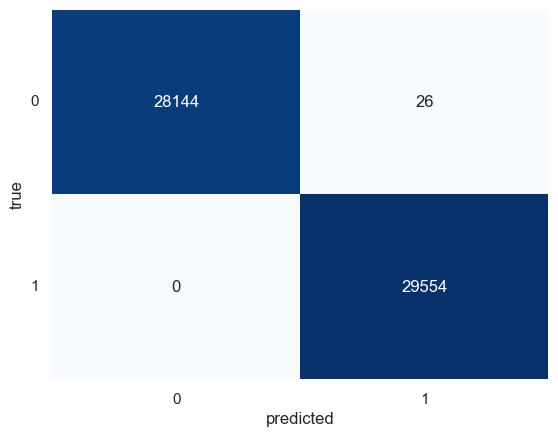

In [56]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred,labels=knn.classes_)
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",cbar=False)
plt.xlabel("predicted")
plt.ylabel("true")
plt.yticks(rotation=0)

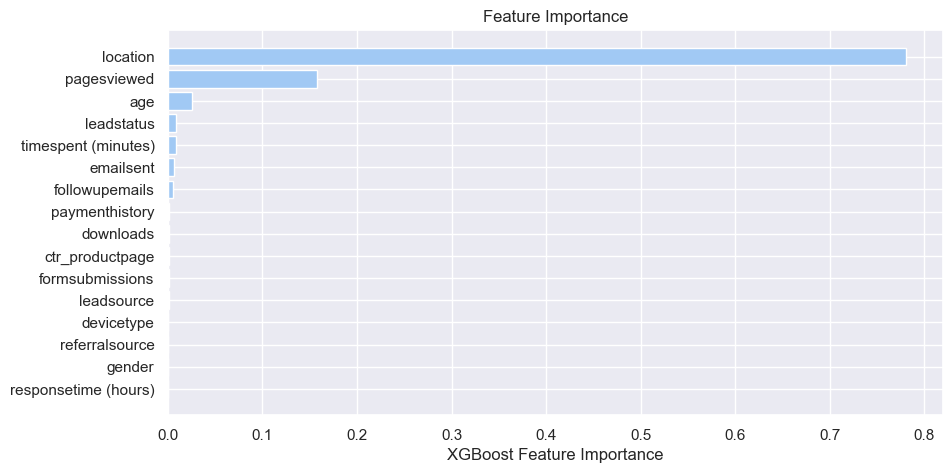

In [58]:
sorted_idx = xgb_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx], xgb_regressor.feature_importances_[sorted_idx])
plt.xlabel("XGBoost Feature Importance")
plt.title("Feature Importance")
plt.show()